# Régression Linéaire Multiple

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [3]:
df_mul = pd.read_csv("./boston_house_prices.csv")
df_mul.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
x1 = np.array(df_mul["RM"])
x1 = x1.reshape(len(x1), 1)
x2 = np.array(df_mul["LSTAT"])
x2 = x2.reshape(len(x2), 1)
y_mul = np.array(df_mul["MEDV"])
y_mul = y_mul.reshape(len(y_mul), 1)

In [5]:
X_mul = np.hstack((x1, x2, np.ones(x1.shape)))
X_mul.shape

(506, 3)

In [6]:
theta_mul = np.random.randn(3, 1)
theta_mul

array([[-0.54866248],
       [-1.26337206],
       [-2.05539337]])

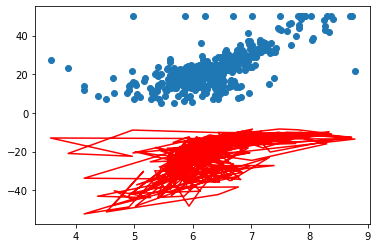

In [7]:
plt.scatter(x1, y_mul)
plt.plot(x1, model(X_mul, theta_mul), c='red')

In [8]:
cost_function(X_mul, y_mul, theta_mul)

991.1062542619024

In [9]:
theta_final_mul, cost_history_mul = gradient_descent(X_mul, y_mul, theta_mul, 0.001, 300)

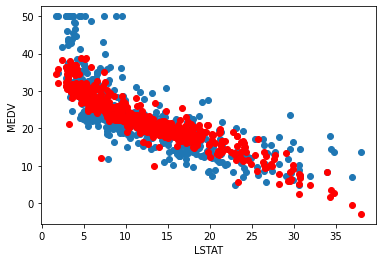

In [10]:
pred_mul = model(X_mul, theta_final_mul)
plt.scatter(x2, y_mul)
plt.scatter(x2, pred_mul, c="red")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

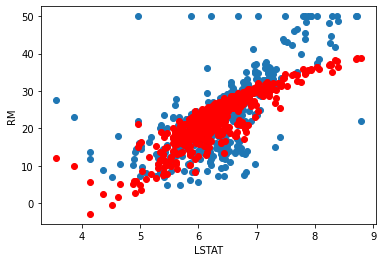

In [11]:
pred_mul = model(X_mul, theta_final_mul)
plt.scatter(x1, y_mul)
plt.scatter(x1, pred_mul, c="red")
plt.xlabel('LSTAT')
plt.ylabel('RM')
plt.show()

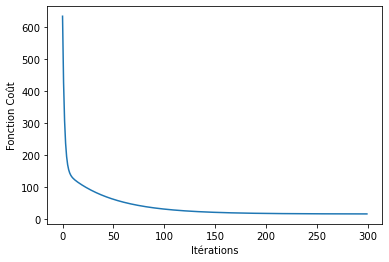

In [12]:
# Fonction coût 
plt.plot(range(300), cost_history_mul)
plt.xlabel('Itérations')
plt.ylabel('Fonction Coût')
plt.show()

In [13]:
coef_determination(y_mul, pred_mul)

0.6340806648090851

In [14]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

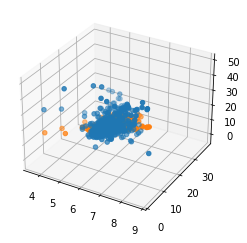

In [15]:
# Visualisation en 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x1, x2, y_mul)
ax.scatter(x1, x2, pred_mul)

## Avec Sklearn

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [17]:
#df_mul = pd.read_csv("./boston_house_prices.csv")
df_mul.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
x = df_mul.iloc[:,:-1].values.reshape(-1, 13)
y = df_mul.iloc[:,-1].values.reshape(-1, 1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(339, 13) (167, 13)
(339, 1) (167, 1)


In [20]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([[-1.19139697e-01,  4.76307169e-02,  3.11385581e-03,
         2.51765094e+00, -1.65965017e+01,  3.66544866e+00,
        -1.13971582e-02, -1.58813261e+00,  2.52228398e-01,
        -1.08619777e-02, -1.04804097e+00,  6.18082895e-03,
        -5.19802805e-01]])

In [21]:
y_pred = model.predict(x_test)

<IPython.core.display.Javascript object>


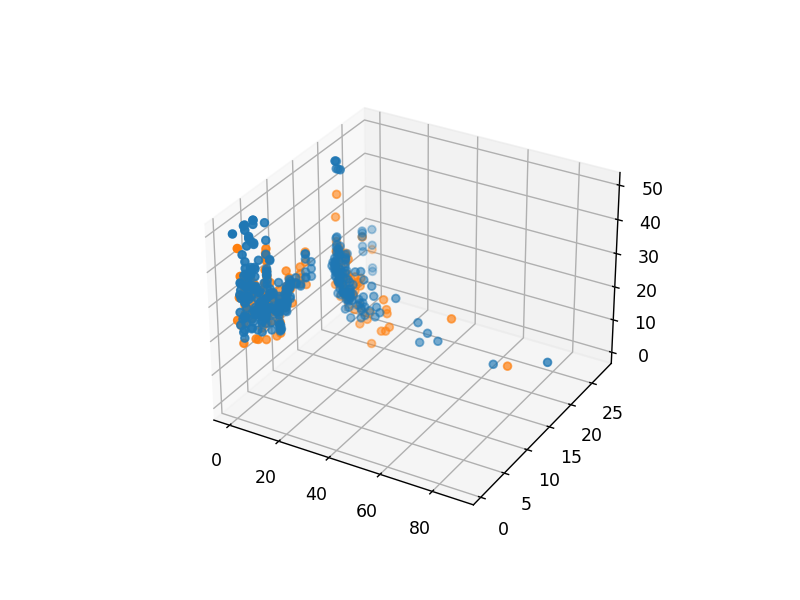

In [22]:
# Visualisation en 3D
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x_train[:,0], x_train[:,2], y_train)
ax.scatter(x_test[:,0], x_test[:,2], y_pred)

In [23]:
mean_squared_error(y_test, y_pred)

26.558581842040624